# Accessing the project's API's

## Inowas

In [1]:
import os
import requests
import json
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

In [2]:
request = requests.get('https://sensors.inowas.com/list').json()
request_index = [ i for i in request if i['project'] == 'DEU1']
df = pd.DataFrame(request_index)
df

,id,location,name,parameters,project
0,b4b39661-7033-4c04-a51a-36cb36507fc8,,123,"[t_intern, ec_25, ec, h_level, v_batt, t, h]",DEU1
1,548843f7-f354-4f59-a2e3-d51a444d42e3,,124,"[ec_25, h, h_level, t, t_intern, v_batt, ec]",DEU1
2,4ff6932b-722d-42c2-b6e2-0124dceaf934,,125,"[v_batt, ec, ec_25, h, h_level, t, t_intern]",DEU1
3,99911176-6e05-4cc6-b01d-86b33010b2bd,,126,"[h, h_level, t, t_intern, v_batt, ec, ec_25]",DEU1
4,d79989b8-bde9-4744-bc39-1de03562284c,,127,"[ec, v_batt, t_intern, t, h_level, h, ec_25]",DEU1
5,92f5a88d-e079-47c3-a983-26db8c317a5e,,I-2,"[ph, h_level, ldo, h, v_batt, ec, t, ec_25, t_...",DEU1
6,a0b8f4e7-ac0c-4a50-aec5-e96704089732,,I-3,"[t, ec, ec_25, h, h_level, ldo, ph, t_intern, ...",DEU1
7,a02ac9ac-784e-4be3-81cb-30e89541310a,,I-5,"[v_batt, t_intern, t, ph, ldo, h_level, h, ec_...",DEU1
8,2c290fe2-9518-4ce4-8359-805b0e262c78,,I-6,"[h, ec_25, v_batt, t_intern, t, ph, ldo, h_lev...",DEU1


In [35]:
for i in df.iterrows():
    print(i[1]['id'], i[1]['name'])

b4b39661-7033-4c04-a51a-36cb36507fc8 123
548843f7-f354-4f59-a2e3-d51a444d42e3 124
4ff6932b-722d-42c2-b6e2-0124dceaf934 125
99911176-6e05-4cc6-b01d-86b33010b2bd 126
d79989b8-bde9-4744-bc39-1de03562284c 127
92f5a88d-e079-47c3-a983-26db8c317a5e I-2
a0b8f4e7-ac0c-4a50-aec5-e96704089732 I-3
a02ac9ac-784e-4be3-81cb-30e89541310a I-5
2c290fe2-9518-4ce4-8359-805b0e262c78 I-6


In [11]:
df_ = df.loc [df.project == 'DEU1']
parameters_list = []
for diver in df_.iterrows():
    parameters = diver[1].parameters
    for parameter in parameters:
        if parameter in parameters_list: continue
        parameters_list.append(parameter)
for i,j in enumerate(parameters_list):
    print(i,j)

0 t_intern
1 ec_25
2 ec
3 h_level
4 v_batt
5 t
6 h
7 ph
8 ldo


h_level and h are the same variables

## New API

```python
[11:06 PM, 23/11/2022] Ralf Junghanns INOWAS 🇩🇪: https://sensors.inowas.com/sensors/project/DEU1/latest
[11:15 PM, 23/11/2022] Ralf Junghanns INOWAS 🇩🇪: https://sensors.inowas.com/sensors/project/DEU1/latest?since=1669065118
[11:15 PM, 23/11/2022] Ralf Junghanns INOWAS 🇩🇪: con timestamp
```

In [2]:
import requests

In [3]:
URL = 'https://sensors.inowas.com/sensors/project/DEU1/latest'
request = requests.get(URL).json()

In [2]:
URL = 'https://sensors.inowas.com/sensors/project/DEU1/latest?since=1669065118'
r = requests.get(URL).json()

In [3]:
len(r)

2359

In [5]:
for i,j in r[1].items():
    print(i,j)
    

project_name DEU1
sensor_name I-5
parameter_name t
timestamp 1669068000.0
value 12.64


In [6]:
import datetime, time
import pandas as pd

In [32]:
date_time = datetime.datetime(2021, 7, 26, 21, 20)

ts = time.mktime(date_time.timetuple())
date_time = datetime.datetime(2021, 11, 21, 11, 58)
ts = time.mktime(date_time.timetuple())


date_time2 = datetime.datetime.fromtimestamp(1669065118) 

print(date_time, ts, date_time2)

2021-11-21 11:58:00 1637492280.0 2022-11-21 22:11:58


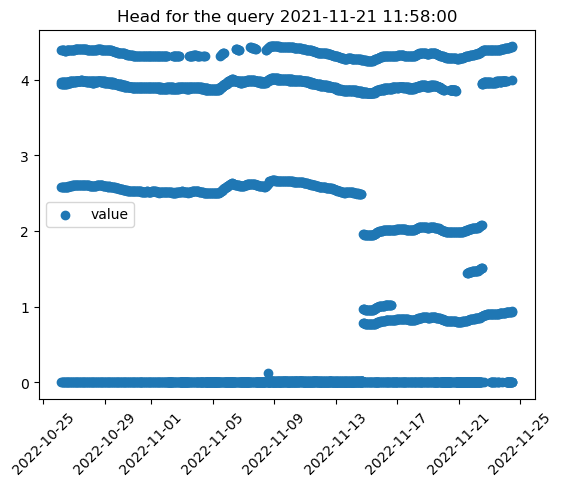

Wall time: 17.1 s


In [84]:
%%time
date_time = datetime.datetime(2021, 11, 21, 11, 58)
ts = time.mktime(date_time.timetuple())
URL = f'https://sensors.inowas.com/sensors/project/DEU1/latest?since={int(ts)}'
request = requests.get(URL).json()

fig = plt.subplots()
df = pd.DataFrame(request)
df.insert(1, 'Date', pd.to_datetime(df['timestamp'], unit='s'))
plt.scatter('Date', 'value', data = df[(df.parameter_name == 'h') > (df.value < -99 )])
plt.xticks(rotation = 45)
plt.title(f'Head for the query {date_time}')
plt.legend()
plt.savefig('test-api.jpeg')
plt.show()


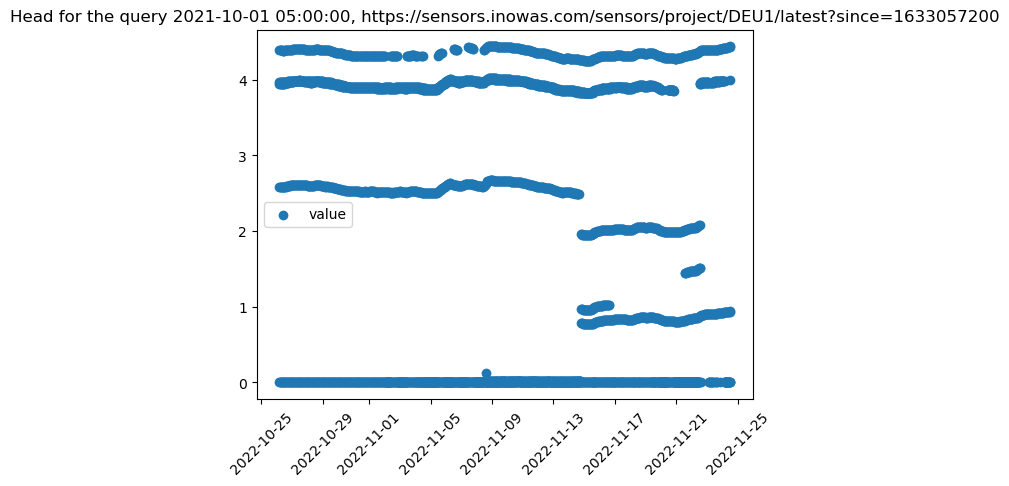

Wall time: 16.4 s


In [85]:
%%time
date_time = datetime.datetime(2021, 10, 1, 5, 0)
ts = time.mktime(date_time.timetuple())
URL = f'https://sensors.inowas.com/sensors/project/DEU1/latest?since={int(ts)}'
request = requests.get(URL).json()

fig = plt.subplots()
df = pd.DataFrame(request)
df.insert(1, 'Date', pd.to_datetime(df['timestamp'], unit='s'))
plt.scatter('Date', 'value', data = df[(df.parameter_name == 'h') > (df.value < -99 )])
plt.xticks(rotation = 45)
plt.title(f'Head for the query {date_time}, {URL}')
plt.legend()
plt.savefig('test-api.jpeg')
plt.show()


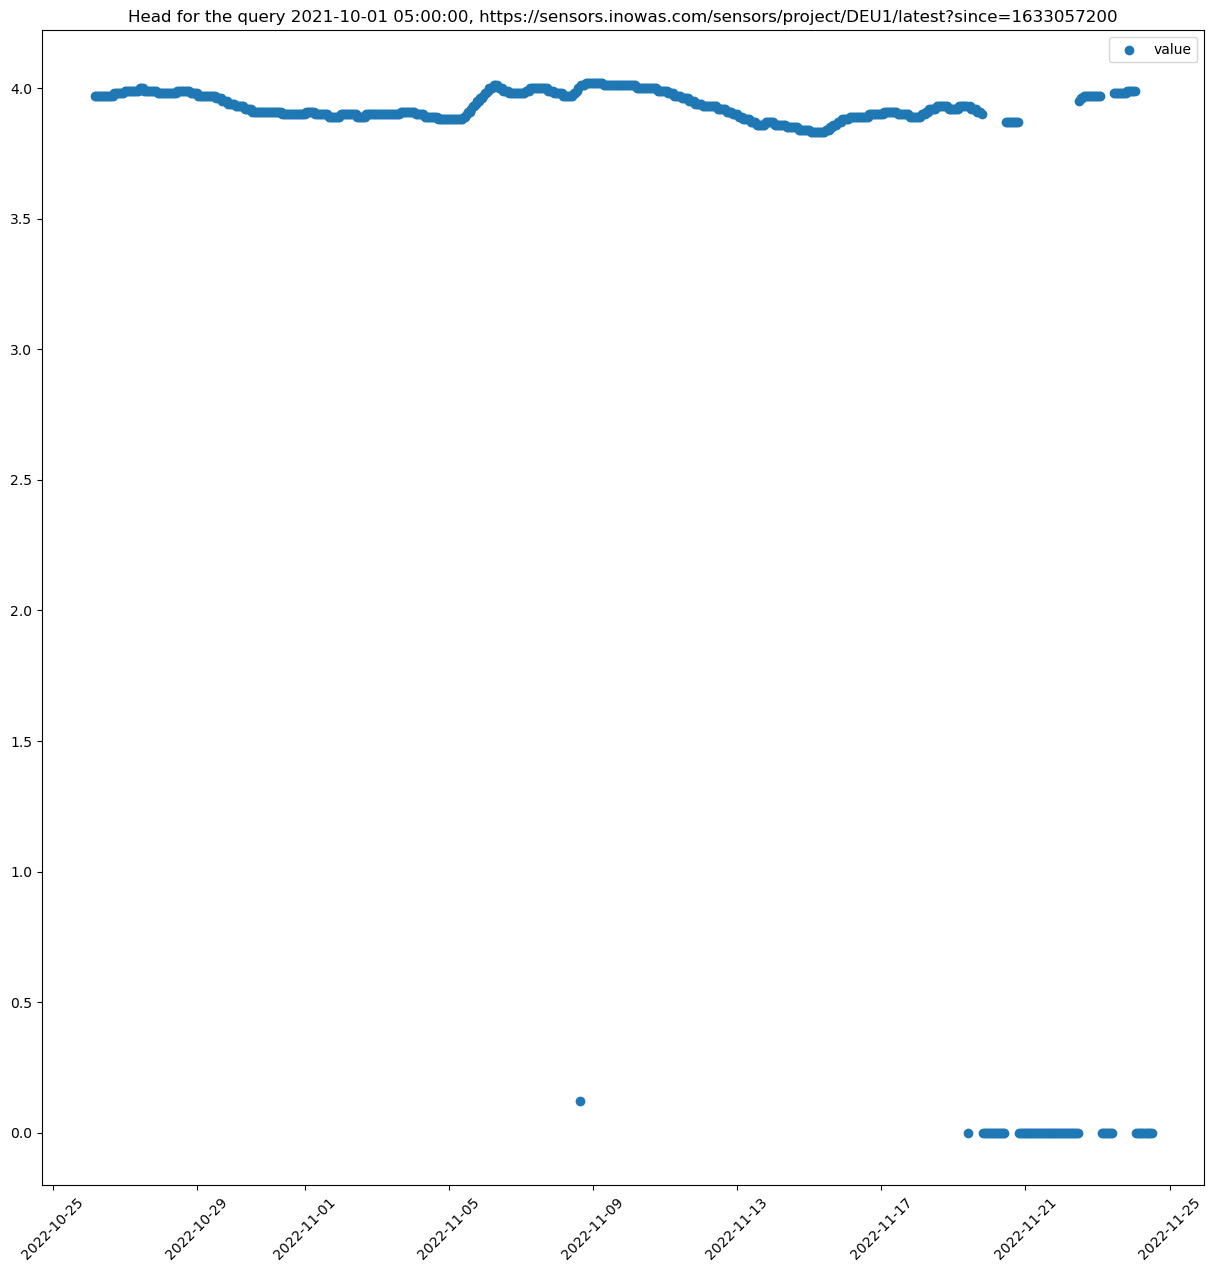

In [104]:
# fig = plt.subplots()
fig = plt.figure(figsize = (15,15))
df = pd.DataFrame(request)
df = df [ df.sensor_name == 'I-2']
df.insert(1, 'Date', pd.to_datetime(df['timestamp'], unit='s'))
plt.scatter('Date', 'value', data = df[(df.parameter_name == 'h') > (df.value < -99 )])
plt.xticks(rotation = 45)
plt.title(f'Head for the query {date_time}, {URL}')
plt.legend()
plt.savefig('test-api.jpeg')
plt.show()

In [91]:
df.groupby(['parameter_name', 'sensor_name']).value.sum().to_frame()

value
parameter_name sensor_name          
ec             123            21.643
               124           100.223
               126            11.635
               127           288.567
               I-2           268.122
               I-3            36.451
               I-5           251.477
ec_25          123            29.493
               124           138.944
               126            16.091
               127           397.833
               I-2           364.216
               I-3            50.059
               I-5           345.875
h              123            46.756
               124           199.135
               126            36.873
               127          1579.928
               I-2          2474.070
               I-3          2450.920
               I-5          2632.110
h_level        123            46.756
               124           199.135
               126            36.873
               127          1579.928
               I-2          2474.070
               I-3          2450.920
               I-5          2632.110
ldo            I-2          1423.772
               I-3          1116.395
               I-5          1328.826
ph             I-2          4951.940
               I-3          4492.460
               I-5          4078.670
t              123          3337.970
               124          5619.600
               126           310.450
               127          8245.490
               I-2          8051.560
               I-3          8043.350
               I-5          7615.800
t_intern       123          2726.120
               124          3466.830
               126          8854.190
               127          6043.180
               I-2          3130.500
               I-3          3675.230
               I-5          6191.770
v_batt         123          1062.270
               124          2437.970
               126          3743.810
               127          3592.870
               I-2          3626.200
               I-3          3614.180
               I-5          3557.930

In [27]:
pd.to_datetime(1668654000)

Timestamp('1970-01-01 00:00:01.668654')

In [29]:
%%time
date_time = datetime.datetime(2021, 5, 1, 0, 0)
ts = time.mktime(date_time.timetuple())
URL = f'https://sensors.inowas.com/sensors/project/DEU1/latest?since={int(ts)}'
r2 = requests.get(URL).json()

Wall time: 15 s


In [23]:
URL

'https://sensors.inowas.com/sensors/project/DEU1/latest?since=1619820000'

In [20]:
df = pd.DataFrame(r2)
df.insert(1, 'Date', pd.to_datetime(df['timestamp'], unit='s'))
df.Date.max() - df.Date.min() 

Timedelta('29 days 09:00:00')

In [21]:
len(df)

32369

In [18]:
len(df)

32369

In [16]:
df.Date.max()

Timestamp('2022-11-24 12:00:00')

In [17]:
df.Date.min()

Timestamp('2022-10-26 03:00:00')

In [57]:
%%time
date_time = datetime.datetime(2021, 11, 20, 0, 0)
ts = time.mktime(date_time.timetuple())
URL = f'https://sensors.inowas.com/sensors/project/DEU1/latest?since={int(ts)}'
r3 = requests.get(URL).json()

Wall time: 19.5 s


In [77]:
df = pd.DataFrame(r3)
df.insert(1, 'Date', pd.to_datetime(df['timestamp'], unit='s'))
print(df.Date.min(), df.Date.max())
print(df.Date.max() - df.Date.min())

2022-10-25 14:00:00 2022-11-23 12:00:00
28 days 22:00:00


In [62]:
df.sensor_name.unique()

array(['I-3', '127', 'I-2', 'I-5', '126', '123', '124'], dtype=object)

In [148]:
df_ = df.groupby(['sensor_name', 'parameter_name']).Date.count().to_frame().reset_index()
df_ = df_.set_index ('sensor_name')
df_ = df_.pivot_table(index = ['sensor_name'], columns = ['parameter_name'])['Date']
df_.columns.name = ''
df_

,ec,ec_25,h,h_level,ldo,ph,t,t_intern,v_batt
sensor_name,,,,,,,,,
123,197.0,197.0,197.0,197.0,NaN,NaN,197.0,197.0,197.0
124,309.0,309.0,309.0,309.0,NaN,NaN,309.0,309.0,309.0
126,677.0,677.0,677.0,677.0,NaN,NaN,677.0,677.0,677.0
127,672.0,672.0,672.0,672.0,NaN,NaN,672.0,672.0,672.0
I-2,695.0,695.0,695.0,695.0,695.0,695.0,695.0,695.0,695.0
I-3,695.0,695.0,695.0,695.0,695.0,695.0,695.0,695.0,695.0
I-5,695.0,695.0,695.0,695.0,695.0,695.0,695.0,695.0,695.0


<AxesSubplot:xlabel='sensor_name'>

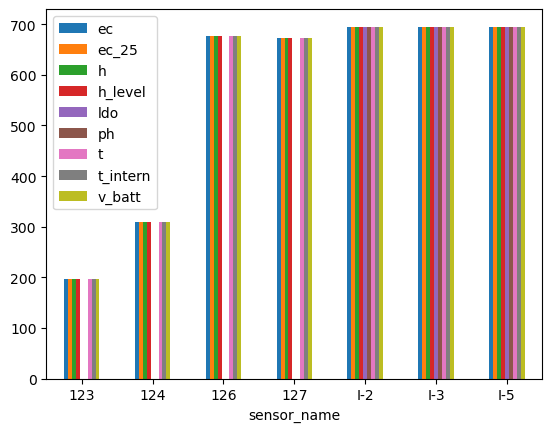

In [149]:
df_.plot.bar(rot=0)

In [76]:
df.groupby(['sensor_name', 'parameter_name']).Date.agg('max') - df.groupby(['sensor_name', 'parameter_name']).Date.agg('min')

sensor_name  parameter_name
123          ec                7 days 23:54:31
             ec_25             7 days 23:54:31
             h                 7 days 23:54:31
             h_level           7 days 23:54:31
             t                 7 days 23:54:31
             t_intern          7 days 23:54:31
             v_batt            7 days 23:54:31
124          ec               12 days 18:29:52
             ec_25            12 days 18:29:52
             h                12 days 18:29:52
             h_level          12 days 18:29:52
             t                12 days 18:29:52
             t_intern         12 days 18:29:52
             v_batt           12 days 18:29:52
126          ec               27 days 23:00:00
             ec_25            27 days 23:00:00
             h                27 days 23:00:00
             h_level          27 days 23:00:00
             t                27 days 23:00:00
             t_intern         27 days 23:00:00
             v_batt           27

<AxesSubplot: xlabel='date_time'>

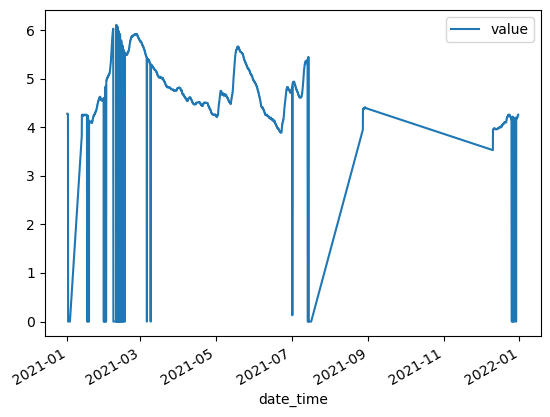

In [216]:
sd = datetime.datetime(2021, 1, 1)
ed = datetime.datetime(2021, 12, 31)
stu =  int(time.mktime(sd.timetuple()))
edu =  int(time.mktime(ed.timetuple()))

parameter, sensor ='h', 'I-6'

URL = f'https://sensors.inowas.com/sensors/project/DEU1/sensor/{sensor}/parameter/{parameter}?timeResolution=RAW&dateFormat=iso&start={stu}&end={edu}&gt=-100.0'


request = requests.get(URL).json()

df = pd.DataFrame(request)
df['date_time'] = pd.to_datetime(df.date_time)
df.plot(x = 'date_time', y = 'value')

### Is there a way?

1. Make a request for all of the sensors for a specific parameter? (Map)
2. Make a request for all of the parameters and a unique sensor? (TimeSeries context)

They use a SOAP WSDL service

In [2]:
import requests

In [18]:
url = 'https://www.umwelt.sachsen.de/umwelt/infosysteme/hwims/webservices/spurwerte-ws?wsdl'

rq = requests.get(url)

In [16]:
rq.headers

{'Date': 'Tue, 22 Nov 2022 16:16:10 GMT', 'Server': 'Apache', 'Content-Type': 'text/xml;charset=UTF-8', 'X-Forwarded-Proto': 'https', 'Cache-Control': 'private', 'Content-Encoding': 'gzip', 'Set-Cookie': 'NSC_wtfswfs-ixjnt-bqqmjlbujpotfswfs=ffffffffaf1b8b1445525d5f4f58455e445a4a4229a0;path=/;secure;httponly', 'Keep-Alive': 'timeout=15, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked'}

In [4]:
url="http://wsf.cdyne.com/WeatherWS/Weather.asmx?WSDL"
#headers = {'content-type': 'application/soap+xml'}
headers = {'content-type': 'text/xml'}
body = """<?xml version="1.0" encoding="UTF-8"?>
         <SOAP-ENV:Envelope xmlns:ns0="http://ws.cdyne.com/WeatherWS/" xmlns:ns1="http://schemas.xmlsoap.org/soap/envelope/" 
            xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:SOAP-ENV="http://schemas.xmlsoap.org/soap/envelope/">
            <SOAP-ENV:Header/>
              <ns1:Body><ns0:GetWeatherInformation/></ns1:Body>
         </SOAP-ENV:Envelope>"""

response = requests.post(url,data=body,headers=headers)
print (response.content)

ConnectionError: HTTPConnectionPool(host='wsf.cdyne.com', port=80): Max retries exceeded with url: /WeatherWS/Weather.asmx?WSDL (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DA86298100>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))